# Import Libraries and Dataset

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df_sales = pd.read_csv('advertising.csv.xls')
df_sales.info()
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

# EDA Analysis

In [6]:
df_sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

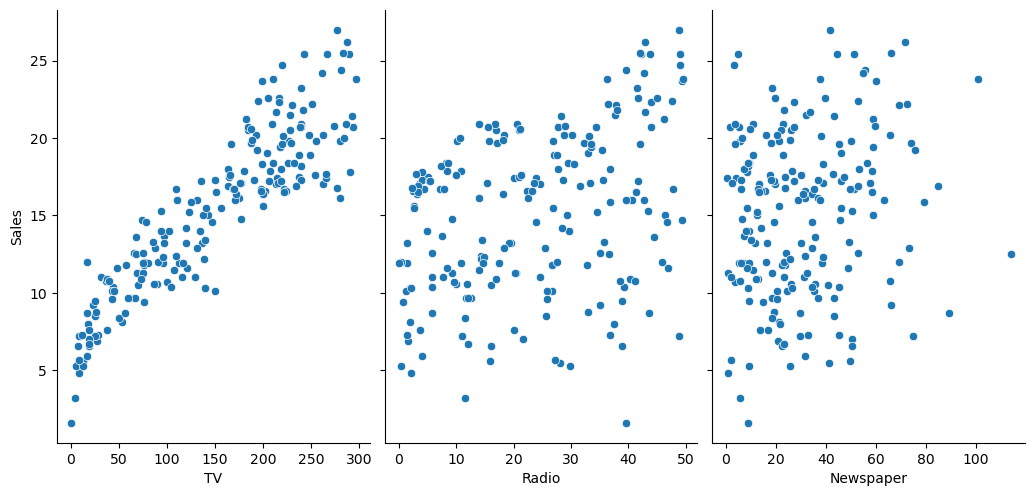

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

In [7]:
sns.pairplot(df_sales,
             x_vars=['TV','Radio','Newspaper'],
             y_vars=['Sales'],
             height=5, aspect=0.70)
plt.show()

df_sales.corr()

Higher TV advertising budgets are strongly associated with higher sales.

# Split dataset

In [10]:
# Split the data into features (X) and target (y)
X = df_sales[['TV', 'Radio', 'Newspaper']]
y = df_sales['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LR model and Evaluate the performance

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R² Score: 0.9059011844150826
Mean Squared Error: 2.9077569102710896
Mean Absolute Error: 1.2748262109549335
